<a href="https://colab.research.google.com/github/Daprosero/Deep-Convolutional-Generative-Adversarial-Network/blob/master/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#sistema de visión por computador basado en aprendizaje profundo para la detección de objetos sobre imágenes y video.


La deteección de obejtos es una técnica vinculada a la visión artificial y el procesamiento digital de imagenes que busca la extracción, representación y clasificación de cierto tipo de clases en imagenes y videos. La detección de objetos actualmente posee muchas aplicaciones dentro de las cuales se destaca el reconocimiento facial, recuperación de imagenes y seguimineto de objetos.\
El principio básico de la detección de objetos es buscar características propias de una clase, por ejemplo, en un circulo todos los puntos pose una misma distancia a su centro, en un cuadrado se buscan lados con el mismo tamaño y perpendiculares en sus esquinas.\
Para cumplir con el objetivo de Desarrollar un sistema  de visión por computador basado en aprendizaje profundo para la detección de objetos sobre imágenes y videoa partir de la codificación de patrones espacio temporales no estacionarios relevantes, se optó por la implementación de Deep Convolutional Generative Adversarial Networks o DCGAN.




#Generative Adversarial Networks (GAN)

Las GANs es una arquitectura de red neuronal capaz de convertir datos basuras(Ruido) en información relevante(conocimiento). Las GANs utiliza la naturaleza de los adversarios en el cual un modelo generativo compite con un modelo no generativo(Discriminador) para poder lograr objetivos idividuales. Se puede ver este enfrentamiento como el juego de policias y ladrones. los ladrones buscan falsificar dinero cada vez más párecido al real( generador) y los policias de detectar el dinero falso(discriminador).Este modelo llega a un punto en el que es indistinguible el dinero real del falso(50/50) y por ende se puede utilizar las GANs como generadora de datos o detección de datos falsos.\
La estructura general de las GANs es la siguiente:
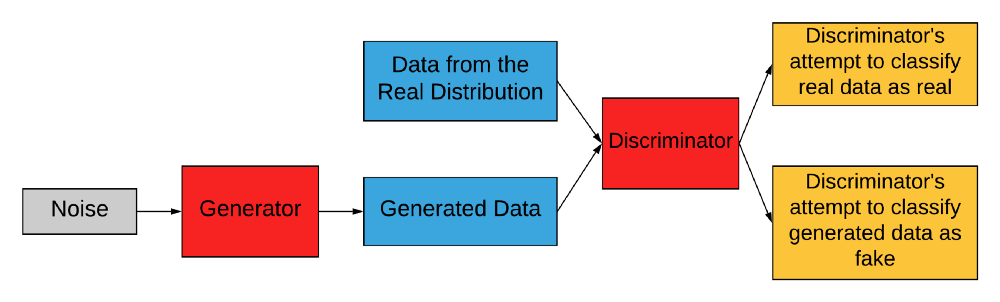
## Ruido
Es la distribución aleatoria que se buca transformar a una distribución deseada, es decir, Las GANs asignan una función estadistica de una distribución a otra.
## Datos de la distribución real
Es la distribución real o deseada, es el objetivo final de las GANs  a la hora de transformar el ruido. En el ejemplo del juego de policias y ladrones este es el conjunto de imagnes de dinero real con el cual se entrena el modelo.
## Discriminador
El proposito del discriminador es el de clasificar los datos como reales o falsas, en pocas palabras, el discriminador tiene las siguientes funciones.
* Clasificar correctamente los datos reales como reales.
* Clasificar correctamente los datos falsos como falsos.

Podemos ver el discriminador como una métrica de evaluación entrenable que nos indica la calidad del generador. 
## Generador
El generador por medio de una red generativa intenta buscar las tendencias de los datos reales y generar nuevos datos pertencientes a la distribución real. Debido a que es el apartado principal de las GANs debe penalizarce fuertemente cada vez que los datos generados se encuentren lejos de los reales y más suavemente cuando estos datos nuevos se encuentren cerca de los reales. Se minimiza la penalización a medida que el generador engañe al discriminador.
## Entrenamiento
Por terminos de convergencia el entrenamiento del generador y discrminador se deben hacer por separado. Se entrena el discriminador por varias epocas y después el generador, esta secuencia continua de un lado a otro hasta llegar al objetivo. Pero, lo que se quiere es realizar el proceso lo más óptiumo posible, es por esto que por cada k pasos optimos del discriminador se da un paso optimo en el generador. 
## Función de costo
\begin{equation}
 _{G}^{Min}\rightleftharpoons_{D}^{Max}= E_{x\sim PData(x)}log(D(x))+E_{z\sim P_{z}(z)}log(1-D(G(z))) 
\end{equation}
En donde:
* D(x): Estiumación de los discriminadores de la probabilidad de que la instancia `x` de los datos.
* $E_{x}$: Valor esperado sobre todas las instancias de los datos reales.
* G(z): Salida del generador cuando se le da un ruido `z`
* D(G(z)): Estimación discriminadora de la probabilidad de que una instancia falsa(G(z)) sea real.
* $E_{z}$ valor esperadosobre todas las entradas aleatorias al generador,En efecto, es el valor esperado sobre todas las instansias falsas generadas G(z).


Esta perdida se conoce como la pérdida Minmax, en donde el generador busca minimizar y el discrimizar busca maximizar la función. En muchas ocaciones se puede modificar esta función para que ocurra lo contrario, es decir, el generador maximice la función y el discriminador la minimice. Esta última modificación se hace debido a que en las primera epocas el discriminador facilmente clasifica los datos reales de los falsos saturando la función de costo, como resultado se tendrá un modelo mas robusto al inicio del entrenamiento.

# Deep Convolutional Generative Adversarial Networks (DCGAN)
los DCGAN son la "versión" de las GANs para imagenes. Esta estructura utiliza principalmente las redes neuronales profundas para generar imagenes a partir del ruido, lo que quiere decir  que esta versión utiliza una red generadora para crear nuevos datos y una red discriminatoria para evaluar el rendimiento del generador. 
## Generador
El generador se basa principalmente en capas convolucionales transpuestas que da como resultado el proceso inverso de las capas convolucionales. Esta sección se encargada de desconvolucioanr el ruido y llevarlo a la distribución deseada. Un ejemplo de este proceso es aplicar un kernel 3x3 sobre una imagen 2x2 con bordes de cero 2X2 (imagen 6x6) y extraer una imagen 4x4

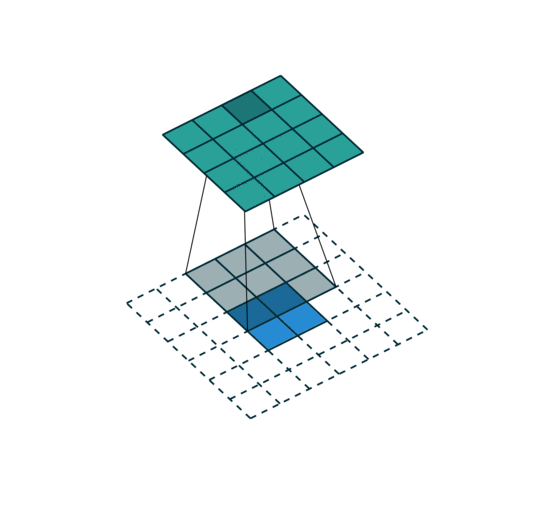

## Discriminador 
El discriminador es simplemente un clasificador binario compuesto por capas convolucionales, una clasificador general de imagenes. La salida de estas capas convolucionales es una salida con la probabilidad de que la imagen sea real o falsa.

## Perdida
Definiremos la perdida como la penalización debido a la equivocación en el funcionamiento de alguno de los dos modelos. En el caso del generador la penalización ocurre cuando el discriminador clasifica las imagenes generadas como falsas. De forma contraria el discriminador debe predecir las salidas y clasificarlas de manera correcta, lo que se traduce en clasificar las imagenes falsas como falsas y las reales como reales, de lo contrario este modelo será penalizado.


#Implementación

Para la implementación de una DCGAN se utilizará dos bases de datos, estas fueron escogidas por su amplia utilización para desarrollar ejemplos debido a su amplia literatura y documentación presente en la actualidad.

Se realizara un paso a paso con la base de datos MNIST con el fin de sentar los conociminetos observados al inicio de este documento y posteriormente se evaluara el mismo modelo con la base de datos CIFAR-10.

## MNIST
Se importan e instalan todas las librerias requeridas en el documento y se carga la base de datos MNIST

In [1]:
# To generate GIFs
!pip install -q imageio
!pip install -q git+https://github.com/tensorflow/docs
#importación de librerías
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
import tensorflow as tf
from IPython import display
#Se carga la base de datos
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()
train_images.shape

(60000, 28, 28)

Se normaliza los valores de la base de datos para que sus valores oscilen entre 1 y -1 debido a que las imagenes se encuentran entre 0 y 255

In [2]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
# Normaliza las imagenes entre [-1, 1]
train_images = (train_images - 127.5) / 127.5 


In [3]:
train_images.shape


(60000, 28, 28, 1)

Se crea una nueva base de datos con lotes aleatorios de tamaño 256

In [4]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

### Generador
Para el generador se usará capas `tf.keras.layers.Conv2DTranspose` la cual genera una imagen a partir de una semilla aleatoria que se muestrea varias veces hasta alcanzar el tamaño de 28x28x1


In [5]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)
    return model

Se utiliza el generador a un no entrenado para viualizar la imagen creada por el modelo  

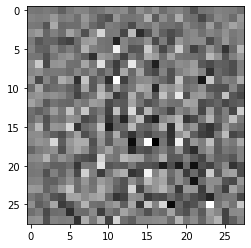

In [6]:
generator = make_generator_model()
noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)
plt.imshow(generated_image[0, :, :, 0], cmap='gray')

El discriminador es un clasificador de imagenes basado en redes neuronales convolucionales que devuelve valores positivos para imagenes reales y negativos para imagenes falsas

In [7]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

Se utiliza el discriminador no entrenado para observar su funcionamiento 

In [8]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[-0.00082297]], shape=(1, 1), dtype=float32)


### Perdidad del discriminador
Esta función mide o cuantifica la eficiencia del discriminador a la hora de predecir las imagenes como falsas o reales, para ello genera una matriz de unos con las predicciones de las imagenes reales y una matriz de ceros con las predicciones de las imagenes falsas.

In [9]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

### Perdida del generador


In [10]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [11]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [12]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [13]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# We will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [14]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [15]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as we go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

In [16]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4,4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

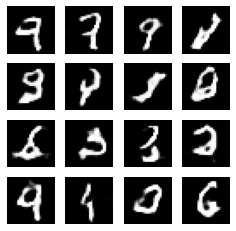

In [17]:
train(train_dataset, EPOCHS)

In [18]:
#checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

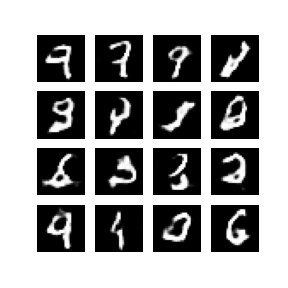

In [19]:
# Display a single image using the epoch number
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))
display_image(EPOCHS)


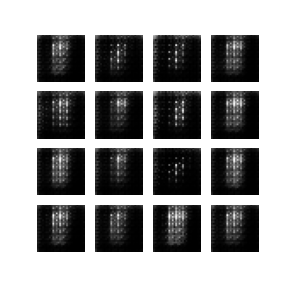

In [20]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)

## CIFAR-10

In [82]:
(train_images, train_labels), (_, _) = tf.keras.datasets.cifar10.load_data()
print(train_images.shape)
#train_images = train_images.reshape(train_images.shape[0], 32, 32, 3).astype('float32')
train_images = (train_images - 127.5) / 127.5 
BUFFER_SIZE = 50000
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
def make_generator_model():
    generator = tf.keras.models.Sequential()
    generator.add(layers.Dense(8*8*256, use_bias=False, input_shape=(100,)))
    generator.add(layers.BatchNormalization())
    generator.add(layers.LeakyReLU())
    generator.add(layers.Reshape((8, 8, 256)))
    assert generator.output_shape == (None, 8, 8, 256)
    generator.add(layers.Conv2DTranspose(filters=256, kernel_size=(5, 5), padding='same', use_bias=False))
    assert generator.output_shape == (None, 8, 8, 256)
    generator.add(layers.BatchNormalization())
    generator.add(layers.LeakyReLU())
    generator.add(layers.Conv2DTranspose(filters=128, kernel_size=(5, 5), padding='same', use_bias=False))
    assert generator.output_shape == (None, 8, 8, 128)
    generator.add(layers.BatchNormalization())
    generator.add(layers.LeakyReLU())
    generator.add(layers.Conv2DTranspose(filters=128, kernel_size=(5, 5), padding='same', use_bias=False))
    assert generator.output_shape == (None, 8, 8, 128)
    generator.add(layers.BatchNormalization())
    generator.add(layers.LeakyReLU())
    generator.add(layers.Conv2DTranspose(filters=64, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert generator.output_shape == (None, 16, 16, 64)
    generator.add(layers.BatchNormalization())
    generator.add(layers.LeakyReLU())
    generator.add(layers.Conv2DTranspose(filters=3, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert generator.output_shape == (None, 32, 32, 3)
    return generator
def make_discriminator_model():
    discriminator = tf.keras.models.Sequential()
    discriminator.add(layers.Conv2D(filters=128, kernel_size=(5, 5), strides=(2, 2), padding='same', input_shape=[32, 32, 3]))
    discriminator.add(layers.LeakyReLU())
    discriminator.add(layers.Dropout(0.3))
    discriminator.add(layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(2, 2), padding='same'))
    discriminator.add(layers.LeakyReLU())
    discriminator.add(layers.Dropout(0.3))
    discriminator.add(layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(2, 2), padding='same'))
    discriminator.add(layers.LeakyReLU())
    discriminator.add(layers.Dropout(0.3))
    discriminator.add(layers.Conv2D(filters=128, kernel_size=(5, 5), strides=(2, 2), padding='same'))
    discriminator.add(layers.LeakyReLU())
    discriminator.add(layers.Dropout(0.3))
    discriminator.add(layers.Flatten())
    discriminator.add(layers.Dense(1))
    return discriminator
discriminator = make_discriminator_model()
generator = make_generator_model()

(50000, 32, 32, 3)


In [83]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4,4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow((predictions[i, :, :, :] * 127.5 + 127.5)/255)#, cmap='gray')
      #print(predictions[i, :, :, :]* 127.5 + 127.5)
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [84]:
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])
    
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated = generator(noise, training=True)
        
        real = discriminator(images, training=True)
        fake = discriminator(generated, training=True)
        
        gen_loss = generator_loss(fake)
        disc_loss = discriminator_loss(real, fake)
        
    generator_gradients = gen_tape.gradient(gen_loss, generator.trainable_variables)
    discriminator_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    
    generator_optimizer.apply_gradients(zip(generator_gradients, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))


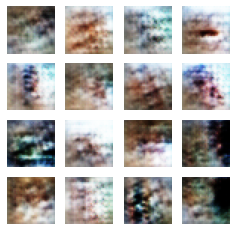

In [85]:
train(train_dataset, EPOCHS)

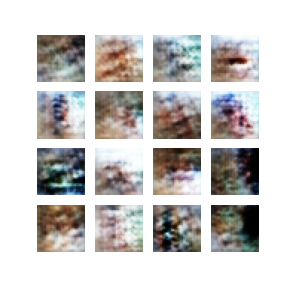

In [86]:
display_image(EPOCHS)


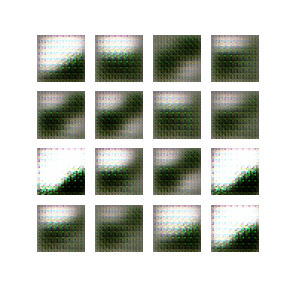

In [87]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)